In [1]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [156]:
data_path  = r'C:\Users\lhauptmann\Code\WristPPG2\data'
imu_file = "1014-0939_imu_data.csv"#"imu_10_10_10_50.csv"
ppg_file = "MAX86177_20241014_095407.ppg.csv"
ppg_file_txt = "ppg_003.txt"

df = pd.read_csv(os.path.join(data_path, imu_file))
#df = df[(1000 < df["timestamp"]) & (df["timestamp"] < 1e7)]
df.sort_values(by=['timestamp'], inplace=True)
df = df[df["timestamp"] > 1.28e6]

Sampling rate: 112.11 Hz


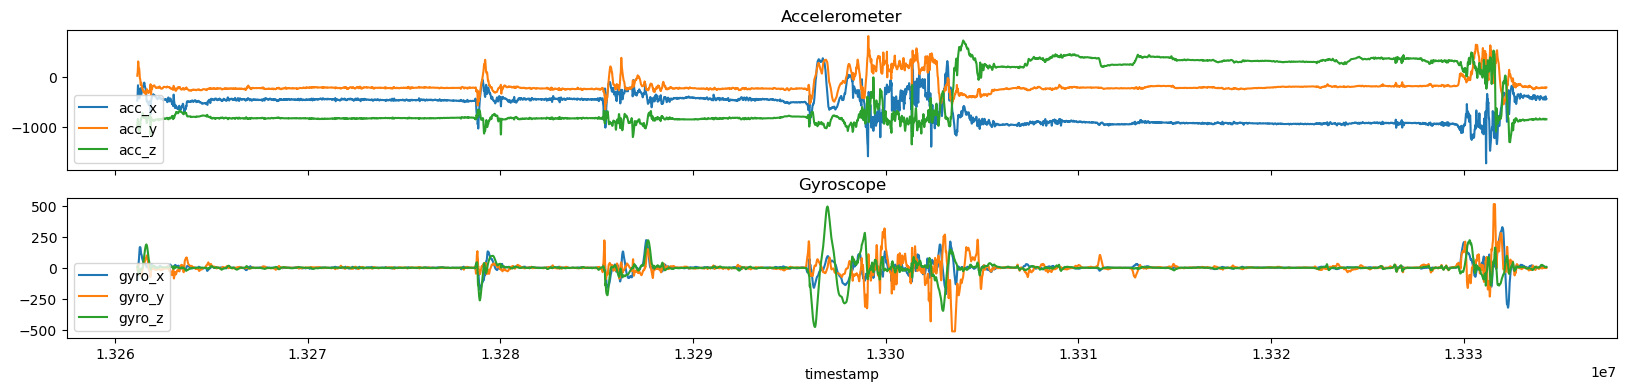

In [134]:
fig, axes = plt.subplots(2, 1, figsize=(20, 4), sharex=True)
df.plot(x='timestamp', y=['acc_x', 'acc_y', 'acc_z'], ax=axes[0])
axes[0].set_title('Accelerometer')
df.plot(x='timestamp', y=['gyro_x', 'gyro_y', 'gyro_z'], ax=axes[1])
axes[1].set_title('Gyroscope')

sampling_rate = 1000/df["timestamp"].diff().median()
print(f"Sampling rate: {sampling_rate:.2f} Hz")

In [157]:
df_ppg = pd.read_csv(os.path.join(data_path, ppg_file), skiprows=32, skipfooter=5)

sampling_rate = 1000/df_ppg["timestamp"].diff().median()
print(f"Sampling rate: {sampling_rate:.2f} Hz")

Sampling rate: 112.27 Hz


C:\Users\lhauptmann\AppData\Local\Temp\ipykernel_23056\3389519280.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_ppg = pd.read_csv(os.path.join(data_path, ppg_file), skiprows=32, skipfooter=5)


In [159]:
df_ppg.columns

Index(['timestamp', 'sampleNum', 'tagMEAS1_PPG1', 'tagMEAS1_PPG2',
       'tagMEAS1_PPG3', 'tagMEAS1_PPG4', 'tagMEAS2_PPG1', 'tagMEAS2_PPG2',
       'tagMEAS2_PPG3', 'tagMEAS2_PPG4', 'tagMEAS3_PPG1', 'tagMEAS3_PPG2',
       'tagMEAS3_PPG3', 'tagMEAS3_PPG4', 'tagMEAS4_PPG1', 'tagMEAS4_PPG2',
       'tagMEAS4_PPG3', 'tagMEAS4_PPG4', 'tagMEAS5_PPG1', 'tagMEAS5_PPG2',
       'tagMEAS5_PPG3', 'tagMEAS5_PPG4', 'tagMEAS6_PPG1', 'tagMEAS6_PPG2',
       'tagMEAS6_PPG3', 'tagMEAS6_PPG4', 'tagMEAS7_PPG1', 'tagMEAS7_PPG2',
       'tagMEAS7_PPG3', 'tagMEAS7_PPG4', 'MEAS1_PPG1', 'MEAS1_PPG2',
       'MEAS1_PPG3', 'MEAS1_PPG4', 'MEAS2_PPG1', 'MEAS2_PPG2', 'MEAS2_PPG3',
       'MEAS2_PPG4', 'MEAS3_PPG1', 'MEAS3_PPG2', 'MEAS3_PPG3', 'MEAS3_PPG4',
       'MEAS4_PPG1', 'MEAS4_PPG2', 'MEAS4_PPG3', 'MEAS4_PPG4', 'MEAS5_PPG1',
       'MEAS5_PPG2', 'MEAS5_PPG3', 'MEAS5_PPG4', 'MEAS6_PPG1', 'MEAS6_PPG2',
       'MEAS6_PPG3', 'MEAS6_PPG4', 'MEAS7_PPG1', 'MEAS7_PPG2', 'MEAS7_PPG3',
       'MEAS7_PPG4', 'ACCX', 

TypeError: no numeric data to plot

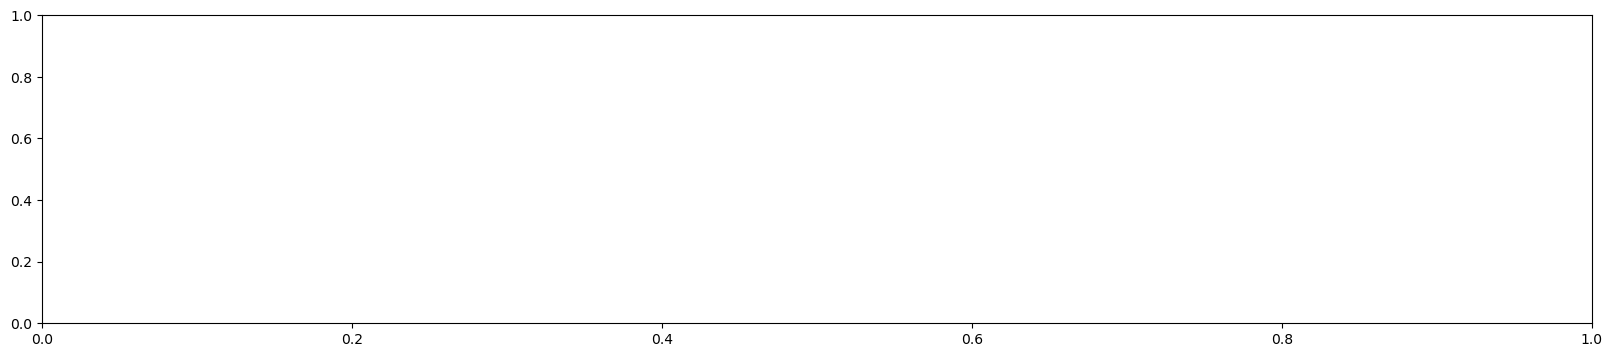

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(20, 4))

df_ppg.plot(y='tagMEAS1_PPG1', ax=ax)

In [154]:
(df_data.iloc[:,5:8] == 0).sum()

5    3
6    4
7    4
dtype: int64

Text(0.5, 1.0, 'IMU Accelerometer')

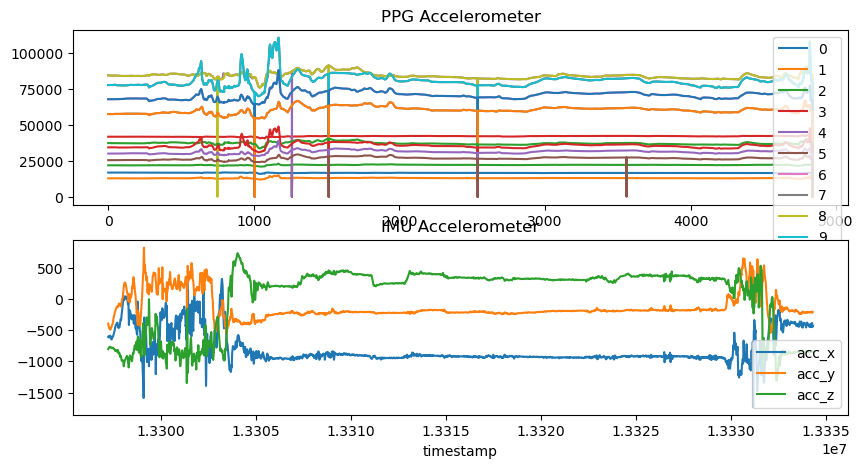

In [147]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=False, sharey=False)

df_data.iloc[:,0:16].plot(ax=axes[0])

axes[0].set_title('PPG Accelerometer')
df.iloc[4000:].plot(x="timestamp", y=['acc_x', 'acc_y', 'acc_z'], ax=axes[1])
axes[1].set_title('IMU Accelerometer')

<Axes: xlabel='timestamp_computer'>

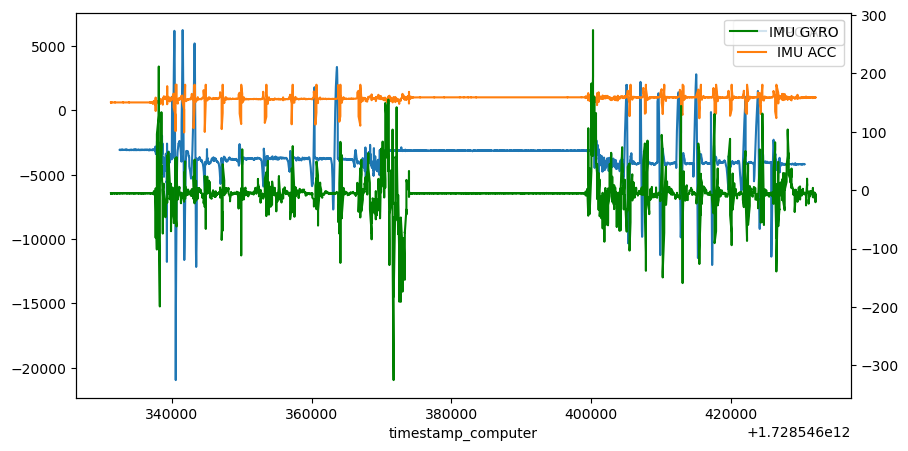

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df["timestamp_al"] = df["timestamp"] - df["timestamp"].min() + df["timestamp_computer"].min()
df_ppg.plot(x='timestamp', y="ACCZ", ax=ax, label="PPG ACC")
df.plot(x="timestamp_computer", y='acc_z', ax=ax, label="IMU ACC")
twinax = ax.twinx()
df.plot(x="timestamp_computer", y='gyro_z', ax=twinax, label="IMU GYRO", color="green")




In [58]:
df_ppg.columns

Index(['timestamp', 'sampleNum', 'tagMEAS1_PPG1', 'tagMEAS1_PPG2',
       'tagMEAS1_PPG3', 'tagMEAS1_PPG4', 'tagMEAS2_PPG1', 'tagMEAS2_PPG2',
       'tagMEAS2_PPG3', 'tagMEAS2_PPG4', 'tagMEAS3_PPG1', 'tagMEAS3_PPG2',
       'tagMEAS3_PPG3', 'tagMEAS3_PPG4', 'tagMEAS4_PPG1', 'tagMEAS4_PPG2',
       'tagMEAS4_PPG3', 'tagMEAS4_PPG4', 'tagMEAS5_PPG1', 'tagMEAS5_PPG2',
       'tagMEAS5_PPG3', 'tagMEAS5_PPG4', 'tagMEAS6_PPG1', 'tagMEAS6_PPG2',
       'tagMEAS6_PPG3', 'tagMEAS6_PPG4', 'tagMEAS7_PPG1', 'tagMEAS7_PPG2',
       'tagMEAS7_PPG3', 'tagMEAS7_PPG4', 'MEAS1_PPG1', 'MEAS1_PPG2',
       'MEAS1_PPG3', 'MEAS1_PPG4', 'MEAS2_PPG1', 'MEAS2_PPG2', 'MEAS2_PPG3',
       'MEAS2_PPG4', 'MEAS3_PPG1', 'MEAS3_PPG2', 'MEAS3_PPG3', 'MEAS3_PPG4',
       'MEAS4_PPG1', 'MEAS4_PPG2', 'MEAS4_PPG3', 'MEAS4_PPG4', 'MEAS5_PPG1',
       'MEAS5_PPG2', 'MEAS5_PPG3', 'MEAS5_PPG4', 'MEAS6_PPG1', 'MEAS6_PPG2',
       'MEAS6_PPG3', 'MEAS6_PPG4', 'MEAS7_PPG1', 'MEAS7_PPG2', 'MEAS7_PPG3',
       'MEAS7_PPG4', 'ACCX', 

In [137]:
data_file = os.path.join(data_path, ppg_file_txt)

data = open(data_file, "r").read()

rows = data.strip().split("\n")

def pad_to_longest(package_dict, padding_value=0):
    longest = max([len(v) for v in package_dict.values()])
    for k in package_dict.keys():
        package_dict[k] += [padding_value] * (longest - len(package_dict[k]))
    return package_dict

def update_dict(data_dict, package_dict, package_id=None):
    
    if package_id is not None:
        package_dict["package_id"] = [package_id] * len(package_dict[0])
    
    for k in package_dict.keys():
        data_dict[k].extend(package_dict[k])
    return data_dict


data_dict = {k:[] for k in range(0,19)}
data_dict["package_id"] = []
package_dict = {k:[] for k in range(0,19)}
# Loop over each row
package_id = 0
previous_key = 100
for row in rows:
    # Split the row by spaces and convert each entry to an integer
    row_split = row.split(" ")
    key = int(row_split[0])  
    data_values = [float(el) for el in row_split[1:] if el != ""]
    if key < previous_key:
        package_dict = pad_to_longest(package_dict)
        data_dict = update_dict(data_dict, package_dict, package_id)
        package_dict = {k:[] for k in range(0,19)}
        package_id += 1
    package_dict[key].extend(data_values)
    previous_key = key
df_data = pd.DataFrame(data_dict)
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,package_id
0,16843.0,12840.0,21919.0,41813.0,84546.0,77812.0,67959.0,57605.0,84539.0,77804.0,67953.0,57597.0,37401.0,34403.0,30077.0,25484.0,2.485291,4.102673,7.931396,2
1,16849.0,12841.0,21925.0,41817.0,84536.0,77804.0,67952.0,57598.0,84529.0,77796.0,67951.0,57596.0,37395.0,34402.0,30077.0,25483.0,2.472729,4.093701,8.025305,2
2,16847.0,12844.0,21929.0,41819.0,84533.0,77806.0,67956.0,57600.0,84529.0,77800.0,67947.0,57595.0,37399.0,34405.0,30072.0,25483.0,2.477515,4.109851,8.002576,2
3,16847.0,12842.0,21927.0,41818.0,84535.0,77815.0,67954.0,57599.0,84521.0,77809.0,67954.0,57594.0,37391.0,34402.0,30073.0,25480.0,2.444019,4.081738,7.944556,2
4,16849.0,12845.0,21925.0,41819.0,84526.0,77810.0,67957.0,57599.0,84517.0,77805.0,67947.0,57596.0,37387.0,34403.0,30070.0,25479.0,2.452393,4.130786,7.956519,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,16665.0,12877.0,21898.0,42292.0,85001.0,80019.0,67117.0,59481.0,84994.0,80019.0,67115.0,59487.0,37588.0,35374.0,29694.0,26306.0,-4.855139,12.111230,8.391370,20
4836,16659.0,12881.0,21902.0,42279.0,84944.0,80115.0,67191.0,59534.0,84932.0,80116.0,67192.0,59533.0,37561.0,35414.0,29725.0,26323.0,-4.421484,11.758325,8.923120,20
4837,16650.0,12885.0,21903.0,42266.0,84920.0,80247.0,67260.0,59590.0,84918.0,80247.0,67264.0,59589.0,37554.0,35473.0,29757.0,26352.0,-3.944763,11.039954,9.020020,20
4838,16644.0,12893.0,21905.0,42257.0,84907.0,80338.0,67368.0,59682.0,84900.0,80327.0,67369.0,59685.0,37550.0,35516.0,29804.0,26394.0,-3.677991,9.771887,8.745471,20


<Axes: >

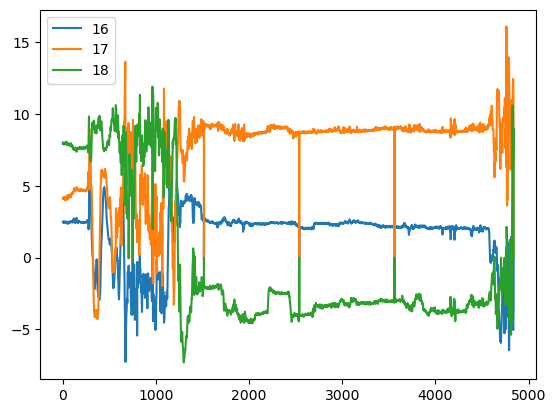

In [140]:
df_data.iloc[:,16:19].plot()